In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Defining a simple feedforward neural network

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

## Loading MNIST dataset

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

## Initializing neural network, loss function and optimizer and Training

In [6]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print(f'Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

# Train the model
train(model, train_loader, criterion, optimizer)

Epoch: 0 [0/60000] Loss: 2.298062
Epoch: 0 [6400/60000] Loss: 0.293504
Epoch: 0 [12800/60000] Loss: 0.461580
Epoch: 0 [19200/60000] Loss: 0.325996
Epoch: 0 [25600/60000] Loss: 0.191095
Epoch: 0 [32000/60000] Loss: 0.400177
Epoch: 0 [38400/60000] Loss: 0.047026
Epoch: 0 [44800/60000] Loss: 0.122964
Epoch: 0 [51200/60000] Loss: 0.106850
Epoch: 0 [57600/60000] Loss: 0.133838
Epoch: 1 [0/60000] Loss: 0.064553
Epoch: 1 [6400/60000] Loss: 0.096191
Epoch: 1 [12800/60000] Loss: 0.115302
Epoch: 1 [19200/60000] Loss: 0.059676
Epoch: 1 [25600/60000] Loss: 0.099177
Epoch: 1 [32000/60000] Loss: 0.150783
Epoch: 1 [38400/60000] Loss: 0.301414
Epoch: 1 [44800/60000] Loss: 0.060328
Epoch: 1 [51200/60000] Loss: 0.231909
Epoch: 1 [57600/60000] Loss: 0.094225
Epoch: 2 [0/60000] Loss: 0.031029
Epoch: 2 [6400/60000] Loss: 0.075751
Epoch: 2 [12800/60000] Loss: 0.031536
Epoch: 2 [19200/60000] Loss: 0.173011
Epoch: 2 [25600/60000] Loss: 0.063475
Epoch: 2 [32000/60000] Loss: 0.072796
Epoch: 2 [38400/60000] Loss

## Visualizing

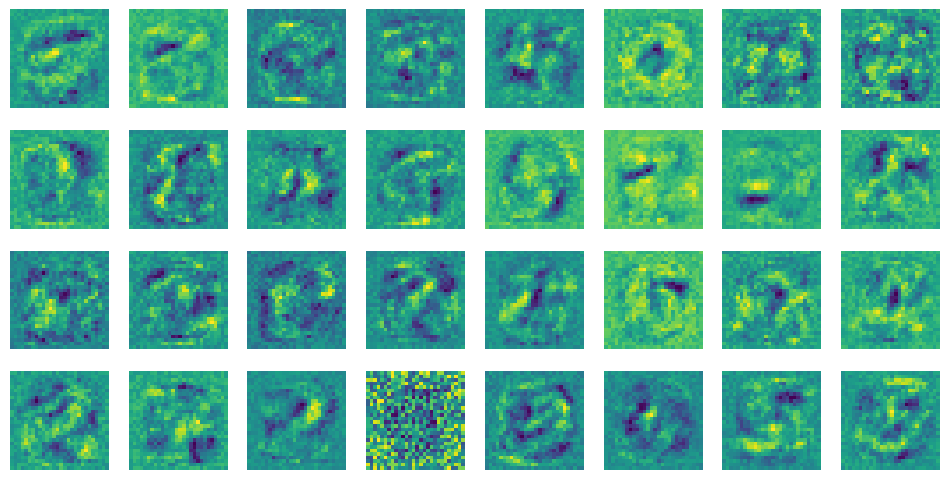

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

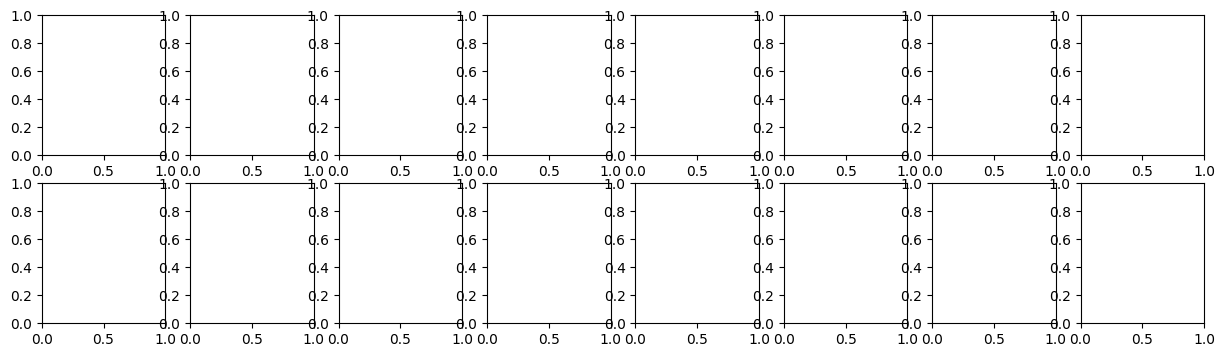

In [ ]:
# single-layer's weights as images
def visualize_weights(model):
    # assuming we want to visualize the weights from the first layer
    weights = model.layer1.weight.data.view(-1, 28, 28)
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < weights.shape[0]:
            ax.imshow(weights[i].cpu(), cmap='viridis')
        ax.axis('off')
    plt.show()

# weights learned by the first layer
visualize_weights(model)

# learned representations for a sample batch
def view_representation(model, data):
    model.eval()  # set to evaluation mode
    with torch.no_grad():
        x = torch.flatten(data, 1)
        hidden_representation = torch.relu(model.layer1(x))
        return hidden_representation

# Example to view representation
example_data, example_target = next(iter(train_loader))
representations = view_representation(model, example_data)

# Visualize the first 8 images and their representations
def visualize_representations(data, representations, num_samples=8):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 4))
    for i in range(num_samples):
        axes[0, i].imshow(data[i].squeeze(), cmap='gray')
        axes[0, i].axis('off')
    plt.tight_layout()
    plt.show()

visualize_representations(example_data, representations)